1. Eigenface for face recognition.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn as skl

b. Load the training set into a matrix X: there are 540 training images in total, each has 50 × 50 pixels that need to be concatenated into a 2500-dimensional vector. So the size of X should be 540 × 2500, where each row is a flattened face image. Pick a face image from X and display that image in grayscale. Do the same thing for the test set. The size of matrix Xtest for the test set should be 100 × 2500.

(540, 2500) (540,)


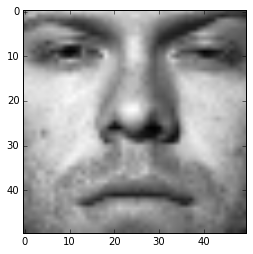

In [2]:
y, X = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    X.append(im.reshape(2500,))
    y.append(line.strip().split()[1])
X, y = np.array(X, dtype=float), np.array(y, dtype=int)
print X.shape, y.shape
plt.imshow(X[10, :].reshape(50,50), cmap = cm.Greys_r)
# plt.show()
plt.savefig("b_example_train.png")

(100, 2500) (100,)


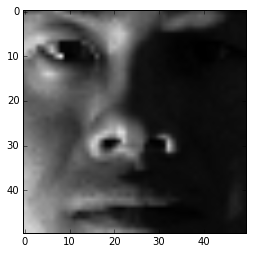

In [8]:
y_test, X_test = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    X_test.append(im.reshape(2500,))
    y_test.append(line.strip().split()[1])
X_test, y_test = np.array(X_test, dtype=float), np.array(y_test, dtype=int)
print X_test.shape, y_test.shape
plt.imshow(X_test[10, :].reshape(50,50), cmap = cm.Greys_r)
# plt.show()
plt.savefig("b_example_test.png")

c. Average Face. Compute the average face μ from the whole training set by summing up every column in X then dividing by the number of faces. Display the average face as a grayscale image.

In [9]:
type(X)

numpy.ndarray

In [10]:
sum = []
for col in X.T:
    sum.append(np.sum(col))

In [11]:
avg = [x/float(len(X)) for x in sum]
avg = np.asarray(avg)

In [12]:
##test. ok this works
avg.shape 
print np.sum(X[:,2000])/float(540)
print avg[2000]

70.662962963
70.662962963


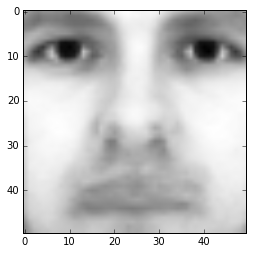

In [13]:
plt.imshow(avg.reshape(50,50), cmap = cm.Greys_r)
plt.savefig("avg_face.png")

(d) Mean Subtraction. Subtract average face μ from every column in X. That is, xi := xi − μ, where xi is the i-th column of X. Pick a face image after mean subtraction from the new X and display that image in grayscale. Do the same thing for the test set Xtest using the pre- computed average face μ in (c).


In [14]:
X_mean_subtraction = X - np.tile(avg, (540, 1))
# X-avg #this is the same as above

In [15]:
##test if the above is working right. it is
# print X[:, 0] - np.tile(avg[0], (540,1))
print avg.shape
# X[:, 0].shape
# np.tile(avg[0], (540,1)).shape
# X_mean_subtraction[:, 0]
# print avg
# avg[0]
print X[0,0] - avg[0]
print X[1,0] - avg[0]
print X[10,0] - avg[0]
# print X[:, 0 ] - avg[0]
# X_mean_subtraction[:, 0]

(2500,)
-54.2518518519
5.74814814815
47.7481481481


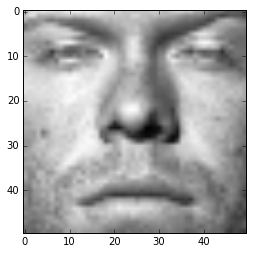

In [16]:
plt.imshow(X_mean_subtraction[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig("X_mean_subtract.png")

In [17]:
X_test.shape

(100, 2500)

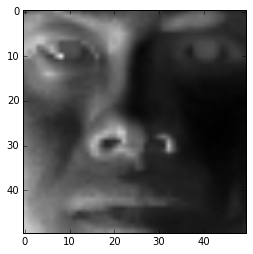

In [18]:
#is this right?
X_test_mean_subtraction = X_test - np.tile(avg, (100, 1))
plt.imshow(X_test_mean_subtraction[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.savefig("X_test_mean_subtract.png")

(e) Eigenface. Perform Singular Value Decomposition (SVD) on training set X ($X = UΣV^T$ ) to get matrix $V^T$ , where each row of $V^T$ has the same dimension as the face image. We refer to $v_i$, the i -th row of $V^T$ , as the i -th eigenface. Display the first 10 eigenfaces as 10 images in grayscale.

In [19]:
X_mean_subtraction.shape

(540, 2500)

In [20]:
U, S, V = np.linalg.svd(X_mean_subtraction)

In [21]:
#i think the V returned by this function is V^T. it is
print V.shape
print U.shape
print S.shape
S
a = np.zeros((540,2500), float)
np.fill_diagonal(a, S)
print a[2,2]
print S[2]
print a.shape

(2500, 2500)
(540, 540)
(540,)
16016.2540827
16016.2540827
(540, 2500)


In [22]:
#check V U and S
i = 300
j = 2220
print np.dot(U, np.dot(a, V))[i,j] 
print X_mean_subtraction[i,j]

-19.5814814815
-19.5814814815


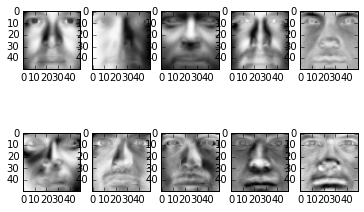

In [23]:
fig = plt.figure()
for x in xrange(10):
    ax = fig.add_subplot(2, 5, x+1)
    ax.imshow(V[x, :].reshape((50,50)),  cmap = cm.Greys_r)
plt.savefig("first_10_eigenfaces.png")

In [24]:
V[1, :]

array([ 0.02594572,  0.02328489,  0.02109684, ..., -0.02438447,
       -0.02445824, -0.02327857])

(f) Low-rank Approximation. Since $\Sigma$ is a diagonal matrix with non-negative real numbers on the diagonal in non-ascending order, we can use the first r elements in $\Sigma$ together with first r columns in U and first r rows in $V^T$ to approximate X. That is, we can approximate X by $\hat{X}_r$ = U[:,: r] $\Sigma$[: r,: r] $V^T$ [: r,:]. The matrix $\hat{X}_r$ is called rank-r approximation of X. Plot the rank-r approximationerror $\|X−\hat{X}_r\|_F$  as a function of r when r =1,2,...,200.

In [25]:
def rank_r_approx(r):
    Sigma = np.zeros((r,r), float)
    np.fill_diagonal(Sigma, S[:r])
#     print Sigma
    return np.dot(np.dot(U[:,:r], Sigma), V[:r, :])
def rank_r_error(r):
    guess = rank_r_approx(r)
    return np.linalg.norm(X - guess)

In [26]:
rank_r_approx(4).shape


(540, 2500)

In [27]:
approx_error = []
for x in xrange(1,201):
    approx_error.append(rank_r_error(x))

In [28]:
print max(approx_error)
print min(approx_error)

100967.529129
85249.7339666


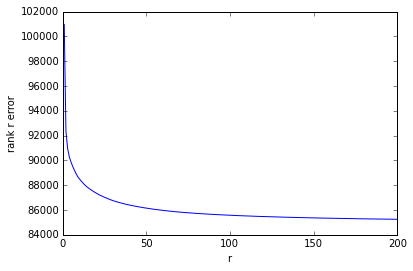

In [29]:
plt.plot(range(1,201), approx_error)
plt.xlabel("r")
plt.ylabel("rank r error")
plt.savefig("rank_error.png")

(g) Eigenface Feature. The top r eigenfaces $V^T$ [: r,:] = {$v_1,v_2,...,v_r$ }$^T$ span an r-dimensional linear subspace of the original image space called face space, whose origin is the average face μ, and whose axes are the eigenfaces {v1,v2,...,vr}. Therefore, using the top r eigenfaces {$v_1,v_2,...,v_r$},we can represent a 2500-dimensional face image z as an r-dimensional feature vector f: f = $V^T$ [: r,:] z = [$v_1,v_2,...,v_r$ ]$^T$ z. Write a function to generate r-dimensional feature matrix F and $F_{test}$ for training images X and test images $X_{test}$, respectively (to get F, multiply X to the transpose of the first r rows of $V_T$. F should have the same number of rows as X and r columns; similarly for $X_{test}$).

In [30]:
def feature_matrix(r, x):
    return np.dot(V[:r,:], x.T)
# V[:2,:].shape

(h) Face Recognition. Extract training and test features for r = 10. Train a Logistic Regression model using F and test on $F_{test}$. Report the classification accuracy on the test set. Plot the classification accuracy on the test set as a function of r when r = 1, 2, . . . , 200.


In [31]:
train_Feature = feature_matrix(10, X)
test_Feature = feature_matrix(10, X_test)
train_Feature.shape
test_Feature.shape
X.shape

(540, 2500)

In [38]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
model = logreg.fit(train_Feature.T, y)
predicted = model.predict(test_Feature.T)

In [39]:
np.sum(predicted == y_test)/float(len(y_test))

0.80000000000000004

In [41]:
accuracy = []
for r in xrange(1, 201):
    train_Feature = feature_matrix(r, X)
    test_Feature = feature_matrix(r, X_test)
    logreg = linear_model.LogisticRegression()
    model = logreg.fit(train_Feature.T, y)
    predicted = model.predict(test_Feature.T)
    accuracy.append(np.sum(predicted == y_test)/float(len(y_test)))

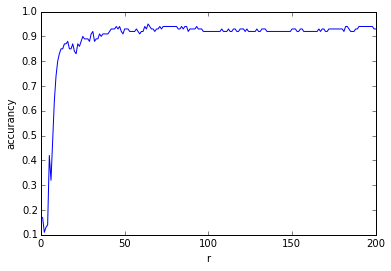

In [42]:
plt.plot(range(1,201), accuracy)
plt.xlabel("r")
plt.ylabel("accurancy")
plt.savefig("classification_accuracy.png")